In [103]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [146]:
# input file names
# movies_csv = "movies_final.csv"
movies_csv = "movies_with_director.csv"
movie_final_csv = "movies_final.csv"

In [153]:
movies_df = pd.read_csv(movies_csv)
movies_final_df = pd.read_csv(movie_final_csv)
movies_df.head()

,genres,budget,id,title,popularity,production_companies,release_date,revenue,Director,ROI
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",30000000,862,Toy Story,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",10/30/1995,373554033.0,John Lasseter,1145.180110
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",65000000,8844,Jumanji,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",12/15/1995,262797249.0,Joe Johnston,304.303460
2,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",16000000,31357,Waiting to Exhale,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,12/22/1995,81452156.0,Forest Whitaker,409.075975
3,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",60000000,949,Heat,17.924927,"[{'name': 'Regency Enterprises', 'id': 508}, {...",12/15/1995,187436818.0,Michael Mann,212.394697
4,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",35000000,9091,Sudden Death,5.231580,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",12/22/1995,64350171.0,Peter Hyams,83.857631


In [154]:
movies_df.release_date = pd.to_datetime(movies_df.release_date)
movies_df['release_year'] = movies_df.release_date.dt.year
movies_df.head()

,genres,budget,id,title,popularity,production_companies,release_date,revenue,Director,ROI,release_year
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",30000000,862,Toy Story,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,373554033.0,John Lasseter,1145.180110,1995
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",65000000,8844,Jumanji,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995-12-15,262797249.0,Joe Johnston,304.303460,1995
2,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",16000000,31357,Waiting to Exhale,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,1995-12-22,81452156.0,Forest Whitaker,409.075975,1995
3,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",60000000,949,Heat,17.924927,"[{'name': 'Regency Enterprises', 'id': 508}, {...",1995-12-15,187436818.0,Michael Mann,212.394697,1995
4,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",35000000,9091,Sudden Death,5.231580,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",1995-12-22,64350171.0,Peter Hyams,83.857631,1995


In [183]:
director_name = input('Enter director name')

Enter director nameJames Cameron


In [196]:
movie_by_director = movies_df[(movies_df['Director'] == director_name)]

movie_by_director.head()

movie_by_director = movie_by_director.sort_values(by='release_year')
filterbydirector = movies_final_df[(movies_final_df['Director'] == director_name)]

genresdirector = filterbydirector.groupby(["genres"]).mean()["ROI"]
# genresdirector = genresdirector.to_frame()
# genresdirector = genresdirector.reset_index()
# genresdirector = genresdirector.sort_values(by='ROI')
genresdirector.head()
# movie_by_director.count()
# movie_by_director.head()

genres
Action          628.306811
Adventure       552.464073
Documentary      31.083623
Drama           822.517094
Fantasy        1076.356577
Name: ROI, dtype: float64

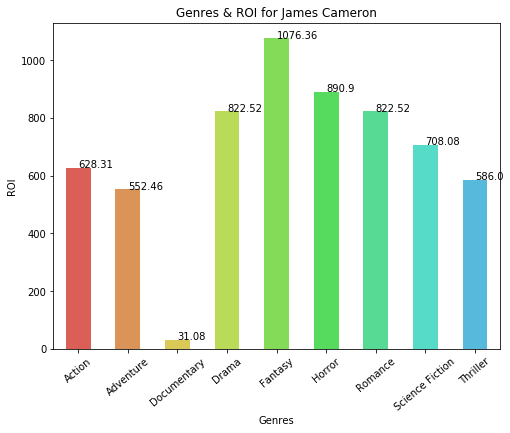

<Figure size 432x288 with 0 Axes>

In [186]:
fig=plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

genresdirector.plot.bar(x = 'genres', y = ['ROI'], rot = 40, ax = ax)

for p in ax.patches:
  ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))

plt.xlabel('Genres')
plt.ylabel('ROI')
plt.title(f'Genres & ROI for {director_name}')
plt.show()
plt.savefig('MovieByJamesCameron.png')

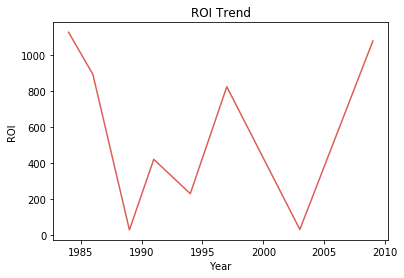

In [195]:
plt.title("ROI Trend")
plt.xlabel("Year")
plt.ylabel("ROI")
plt.plot(movie_by_director.release_year, movie_by_director.ROI)


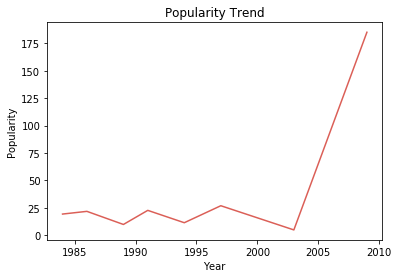

In [194]:
plt.title("Popularity Trend")
plt.xlabel("Year")
plt.ylabel("Popularity")
plt.plot(movie_by_director.release_year, movie_by_director.popularity)

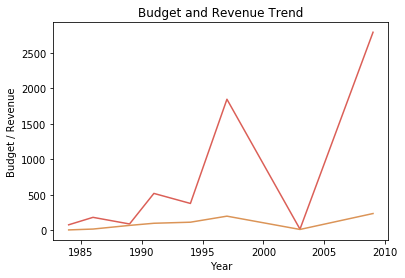

In [193]:
plt.title("Budget and Revenue Trend")
plt.xlabel("Year")
plt.ylabel("Budget / Revenue")
plt.subplot
plt.plot(movie_by_director.release_year, movie_by_director.revenue / 1000000)
plt.plot(movie_by_director.release_year, movie_by_director.budget / 1000000)
plt.show()